In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [265]:
dataset = pd.read_csv("insurance.csv")
df = dataset.copy()
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [266]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [267]:
# cleaning from outliers with using boxplot method

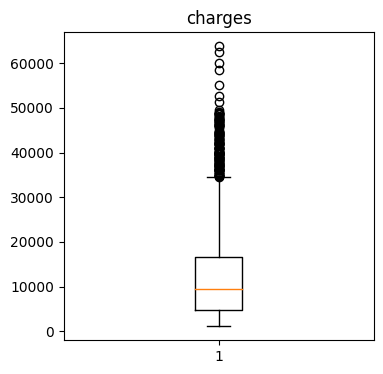

In [268]:
fig, ax = plt.subplots(figsize = (4,4))

ax.set_title("charges")
ax.boxplot(df["charges"]);

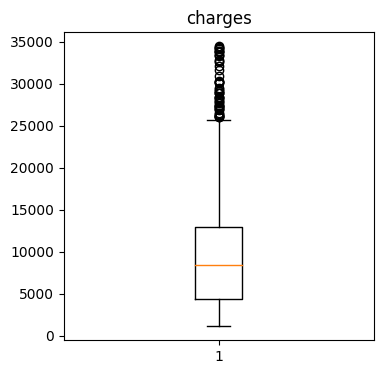

In [269]:
IQR = df["charges"].quantile(0.75) - df["charges"].quantile(0.25) 
upper_bound = df["charges"].quantile(0.75) + (1.5)*IQR
lower_bound = df["charges"].quantile(0.25) - (1.5)*IQR
df = df[(df["charges"]<upper_bound) & (df["charges"]>lower_bound)]
fig, ax = plt.subplots(figsize = (4,4))

ax.set_title("charges")
ax.boxplot(df["charges"]);

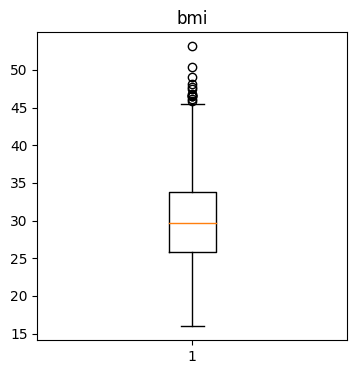

In [270]:
fig, ax = plt.subplots(figsize = (4,4))

ax.set_title("bmi")
ax.boxplot(df["bmi"]);

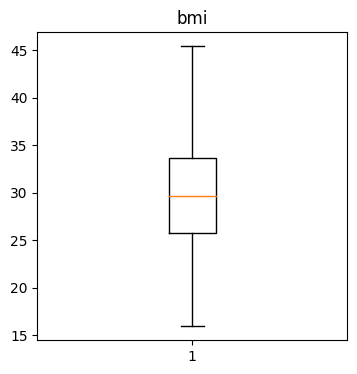

In [271]:
IQR = df["bmi"].quantile(0.75) - df["bmi"].quantile(0.25) 
upper_bound = df["bmi"].quantile(0.75) + (1.5)*IQR
lower_bound = df["bmi"].quantile(0.25) - (1.5)*IQR
df = df[(df["bmi"]<upper_bound) & (df["bmi"]>lower_bound)]
fig, ax = plt.subplots(figsize = (4,4))

ax.set_title("bmi")
ax.boxplot(df["bmi"]);

In [272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1186.0,38.977234,14.078574,18.0000,26.000000,39.00000,51.00000,64.000
bmi,1186.0,29.901530,5.746142,15.9600,25.758750,29.70000,33.69000,45.430
children,1186.0,1.078415,1.212351,0.0000,0.000000,1.00000,2.00000,5.000
charges,1186.0,9957.592500,7264.690874,1121.8739,4418.591062,8411.75495,12982.49245,34472.841


In [273]:
# handling missing values

In [274]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [275]:
# feature scaling

In [276]:
lbe = LabelEncoder()
df["sex"] = lbe.fit_transform(df["sex"])
df["smoker"] = lbe.fit_transform(df["smoker"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [277]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 
X

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [278]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [280]:
X_train

array([[0.0, 0.0, 1.0, ..., 35.97, 1, 0],
       [0.0, 0.0, 1.0, ..., 25.52, 5, 0],
       [1.0, 0.0, 0.0, ..., 31.825, 2, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 23.21, 0, 0],
       [0.0, 0.0, 1.0, ..., 35.53, 0, 0],
       [0.0, 1.0, 0.0, ..., 28.88, 0, 1]], dtype=object)

In [281]:
# multiple linear regression

In [282]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [283]:
ypredict = mlr.predict(X_test)

In [289]:
score = mlr.score(X_test, y_test)
score

0.5994811983499889

# CONCLUSION:
Our accuracy rate is 60%